# APARTEMENT PRICE IN VICTORIA
## BY DWI SMARADAHANA INDRALOKA
***

## INTRODUCTION
Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redeﬁne new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A. The dataset provides living area and conservation status. There are 218 observations and 16 variables.

## IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## UPLOAD DATASET

In [2]:
data = pd.read_csv("victoria.csv")
data = data.drop("row.labels", axis = 1)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null float64
area              218 non-null float64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 25.6+ KB


## MAKE NEW CONSERVATION CATEGORY

In [4]:
data["newconservation"] = np.where(data["conservation"]=="1A", "A",np.where(data["conservation"]=="2A", "B", "C"))
data = data.drop("conservation", axis = 1)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,toilets,garage,elevator,streetcategory,heating,tras,newconservation
0,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,1,0,1,S3,3A,0,C
1,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,2,1,1,S5,4A,1,A
2,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,2,0,1,S2,3A,0,A
3,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,1,0,0,S3,1A,0,B
4,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,2,0,1,S4,4A,1,A


## SEPARATE CATEGORICAL AND NUMERICAL DATA

### 1. CATEGORICAL DATA

In [5]:
data_kategori = ["zone", "category", "out", "garage", "elevator", "streetcategory", "heating", "tras", "newconservation"]
data_kategori = data[data_kategori]
data_numerik = data.drop(data_kategori, axis = 1)
data_kategori.head()

,zone,category,out,garage,elevator,streetcategory,heating,tras,newconservation
0,Z45,4B,E100,0,1,S3,3A,0,C
1,Z31,3B,E50,1,1,S5,4A,1,A
2,Z52,3A,E50,0,1,S2,3A,0,A
3,Z62,4A,E50,0,0,S3,1A,0,B
4,Z31,3A,E100,0,1,S4,4A,1,A


In [6]:
data_y = data["newconservation"].value_counts()
data_y.head()

A    161
C     39
B     18
Name: newconservation, dtype: int64

### 2. NUMERICAL DATA

In [7]:
data_numerik.head()

,totalprice,area,age,floor,rooms,toilets
0,228000.0,7.531000e+09,33,3,5,1
1,409000.0,1.006500e+09,5,7,5,2
2,200000.0,8.887000e+09,14,8,5,2
3,180000.0,6.261000e+09,41,3,4,1
4,443600.0,1.461500e+09,22,6,7,2


In [8]:
data_numerik.describe()

,totalprice,area,age,floor,rooms,toilets
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000
mean,280741.523853,5.718657e+09,19.899083,4.440367,4.853211,1.467890
std,69298.459358,3.455007e+09,14.595590,2.126988,0.634285,0.500116
min,155000.000000,5.300000e+01,1.000000,1.000000,3.000000,1.000000
25%,228500.000000,1.187250e+09,11.000000,3.000000,5.000000,1.000000
50%,269750.000000,7.118500e+09,16.000000,4.000000,5.000000,1.000000
75%,328625.000000,8.542750e+09,24.000000,5.000000,5.000000,2.000000
max,560000.000000,9.992000e+09,118.000000,12.000000,7.000000,2.000000


## DATA VISUALIZATION

Text(0.5, 1.0, 'New Conservation VS Total Price')

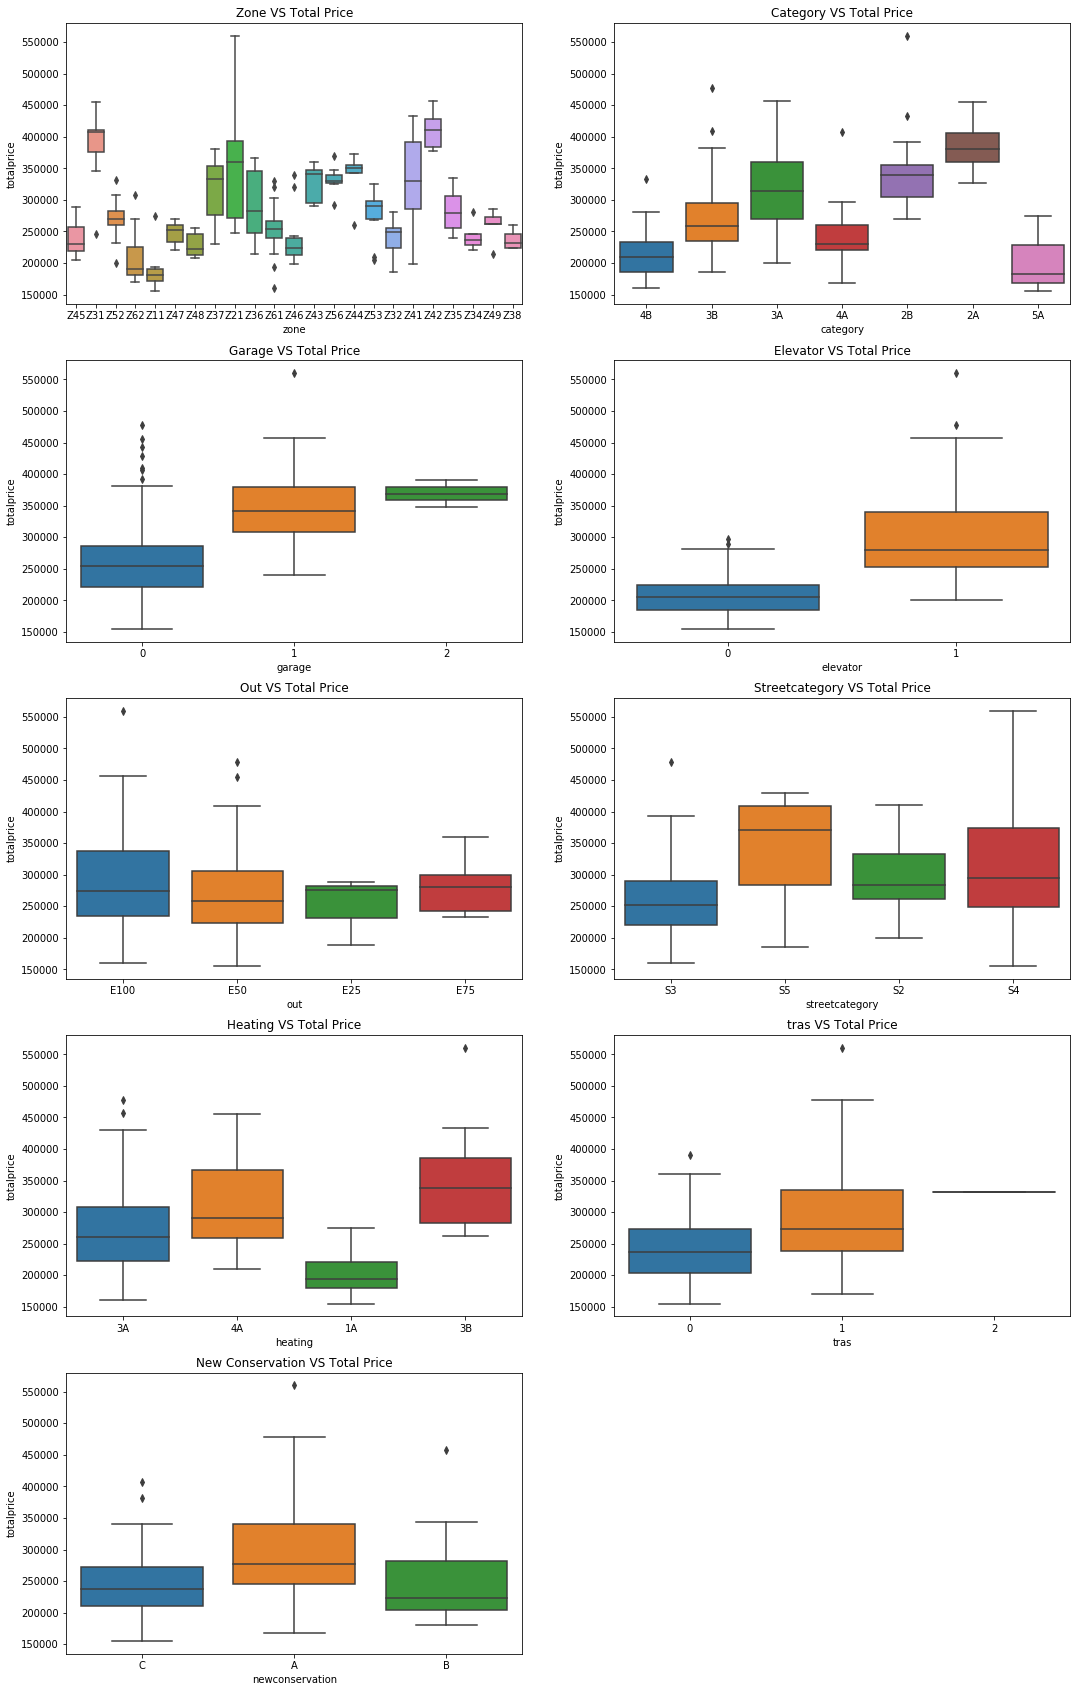

In [9]:
fig = plt.figure(figsize = (18, 30))

fig.add_subplot(5,2,1)
ax = sns.boxplot(x = "zone", y = "totalprice", data = data)
plt.title("Zone VS Total Price")

fig.add_subplot(5,2,2)
ax = sns.boxplot(x = "category", y = "totalprice", data = data)
plt.title("Category VS Total Price")

fig.add_subplot(5,2,3)
ax = sns.boxplot(x = "garage", y = "totalprice", data = data)
plt.title("Garage VS Total Price")

fig.add_subplot(5,2,4)
ax = sns.boxplot(x = "elevator", y = "totalprice", data = data)
plt.title("Elevator VS Total Price")

fig.add_subplot(5,2,5)
ax = sns.boxplot(x = "out", y = "totalprice", data = data)
plt.title("Out VS Total Price")

fig.add_subplot(5,2,6)
ax = sns.boxplot(x = "streetcategory", y = "totalprice", data = data)
plt.title("Streetcategory VS Total Price")

fig.add_subplot(5,2,7)
ax = sns.boxplot(x = "heating", y = "totalprice", data = data)
plt.title("Heating VS Total Price")

fig.add_subplot(5,2,8)
ax = sns.boxplot(x = "tras", y = "totalprice", data = data)
plt.title("tras VS Total Price")

fig.add_subplot(5,2,9)
ax = sns.boxplot(x = "newconservation", y = "totalprice", data = data)
plt.title("New Conservation VS Total Price")

## CORRELATION BETWEEN NUMERICAL DATA

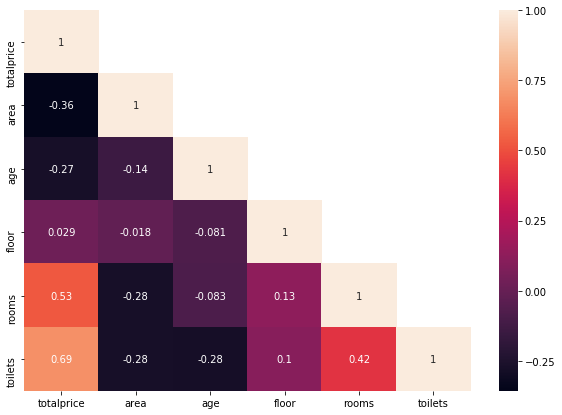

In [10]:
plt.figure(figsize = (10,7))
corr = data_numerik.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask = mask, annot = True)

## FEATURE SELECTION

Based on visualization using boxplot based on the total price (for categorical data) and by analyzing at the correlation value with the total price (for numerical data), we choose 7 variables from categorical data (category, garage, elevator, street category, heating, tras and newconservation) and choose 4 variables from numerical data with correlation more than 0.25 (toilets, rooms, area and age) for modelling.

### 1. DROPPING UNUSED COLUMNS

In [11]:
y = data["totalprice"]
x = data.drop(["totalprice", "zone", "out", "floor"], axis = 1)

### 2. MAKE DATA DUMMIES

In [12]:
z = pd.get_dummies(x, drop_first = True)
z.head()

,area,age,rooms,toilets,garage,elevator,tras,category_2B,category_3A,category_3B,...,category_4B,category_5A,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_3A,heating_3B,heating_4A,newconservation_B,newconservation_C
0,7.531000e+09,33,5,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1.006500e+09,5,5,2,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,8.887000e+09,14,5,2,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,6.261000e+09,41,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1.461500e+09,22,7,2,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0


## MODELLING

### 1. LINEAR REGRESSION IMPORT

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

### 2. SPLIT DATA TRAINING AND DATA TESTING

In [14]:
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size = 0.2, random_state = 0)

### 3. MODEL TRAINING

In [15]:
linreg.fit(z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. PREDICTION

In [16]:
y_pred = linreg.predict(z_test)
y_pred

array([241584.59651123, 285115.39664735, 293186.63729875, 240278.54846503,
       347573.35267433, 301249.69654912, 314735.25559198, 296971.415986  ,
       278900.16738021, 233366.77205579, 198147.48193631, 239025.90988326,
       313890.18135091, 195211.85271732, 321818.7236949 , 245905.20320054,
       307700.50256618, 300824.41827212, 385687.15569513, 290803.50805175,
       273623.67635816, 363204.7787143 , 348801.33436489, 194959.93281515,
       362052.70375969, 189523.44490319, 257419.83684953, 253065.34869781,
       185625.8546687 , 326024.24888857, 228785.63509256, 196120.06444469,
       265394.12647039, 326142.34865174, 266175.18776404, 328098.44994931,
       251434.18462834, 353994.31886509, 390943.34699352, 250560.08802485,
       252980.06148793, 274984.6883361 , 247659.34005712, 376901.87108543])

### 5. CHECK THE ERROR VALUES

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
from sklearn.metrics import mean_absolute_error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)}')

Nilai MAE 28976.675270636333
Nilai MAPE 10.14982931300716


## CONCLUSION

Tony can predict apartment price in Victoria using a linear regression model, where based on the results obtained above the Mean Absolute Error (MAE) value is 28976.675 and the Mean Absolute Percentage Error (MAPE) value is 10.149. The selection of variables that used in modelling is done by analyzing at the visualization using boxplot based on the total price (for categorical data) and by analyzing at the correlation value with the total price (for numerical data).

***
# THANK YOU